In [1]:
# Dataset statistics
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the .csv with archetypes
arch_df = pd.read_csv('archetypes_pl_new.csv', index_col=0)

# Show the table header and column list
arch_df.head()

,innocent,sage,explorer,outlaw,magician,hero,lover,jester,everyman,caregiver,...,protective,generous,thrifty,favourable,balanced,sensuality,intelligent,believe,egocentric,allocentric
id,,,,,,,,,,,,,,,,,,,,,
marek_grodzki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,2.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,0.0,0.0
vege_style_life,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,0.0,3.0
oliwka__2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,2.0,2.0,0.0,3.0,1.0,2.0,4.0,1.0,0.0,3.0
z_przestrzeni_serca,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0.0,4.0,4.0,3.0,4.0,4.0,0.0,1.0
zaradne_warsztaty,3.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,4.0,0.0,2.0,2.0,4.0,2.0,3.0,1.0,3.0


In [3]:
# Table preprocessing - replace all NaN with 2 (Unrelated/Don't know class), replace 0-5 values with the ones in range -1.0 - 1.0
arch_df = arch_df.fillna(2)

# Remove duplicated annotations, to exclude conflicting entries
arch_df = arch_df[~arch_df.index.duplicated(keep='first')]

# Print the head of the dataset after modification
arch_df.head()

,innocent,sage,explorer,outlaw,magician,hero,lover,jester,everyman,caregiver,...,protective,generous,thrifty,favourable,balanced,sensuality,intelligent,believe,egocentric,allocentric
id,,,,,,,,,,,,,,,,,,,,,
marek_grodzki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,2.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,0.0,0.0
vege_style_life,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,0.0,3.0
oliwka__2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,2.0,2.0,0.0,3.0,1.0,2.0,4.0,1.0,0.0,3.0
z_przestrzeni_serca,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0.0,4.0,4.0,3.0,4.0,4.0,0.0,1.0
zaradne_warsztaty,3.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,4.0,0.0,2.0,2.0,4.0,2.0,3.0,1.0,3.0


AttributeError: 'Rectangle' object has no property 'transparent'

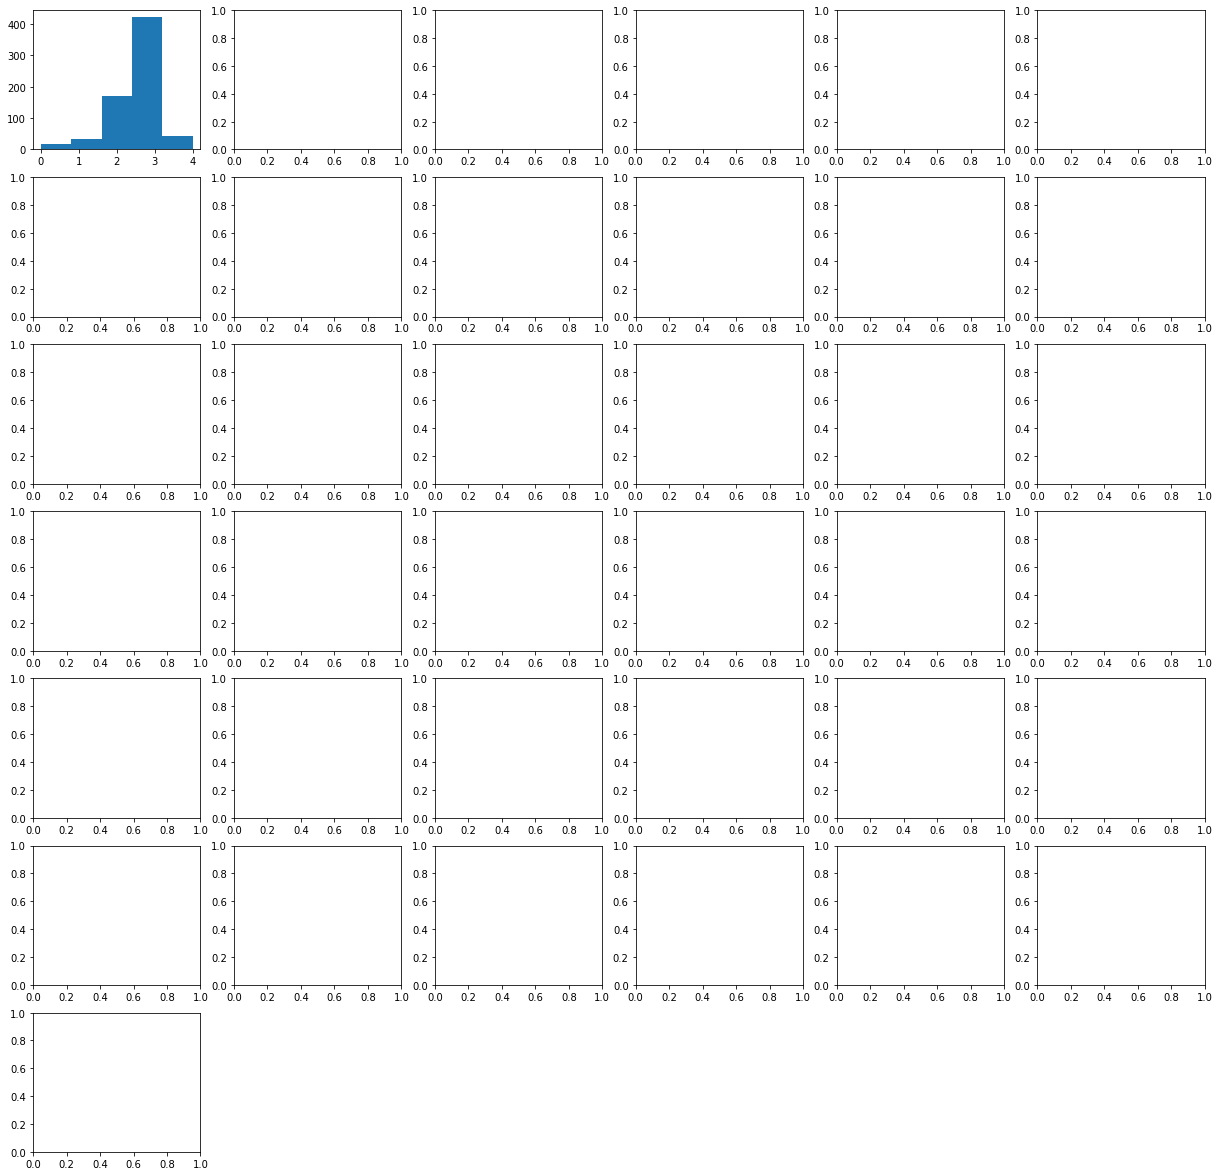

In [11]:
# Show classes histogram
hist = arch_df.hist(bins=5, figsize=(21,21), transparent=True)
plt.savefig("trait_histogram.png")

## AGDS - get softmax values

In [12]:
# Associate words with archetypes/character traits as intermediate layer
# and with influencer as the "last" layer

# Dependencies
import pandas as pd
import numpy as np
from tqdm import tqdm
import copy
import os
import toml
import re
import itertools
from text_cleaner import *
import operator
from collections import Counter
import pickle

def extract_hashtags(post_text):
    HASH_RE = re.compile(r"\#\w+")
    out_list = re.findall(HASH_RE, post_text)
    return out_list

In [13]:
# Load the .csv with archetypes
arch_df = pd.read_csv('archetypes_pl_new.csv', index_col=0)

# Save the order of columns
trait_list = arch_df.columns.tolist()

# Show the table header and column list
print(trait_list)
arch_df.head()

['innocent', 'sage', 'explorer', 'outlaw', 'magician', 'hero', 'lover', 'jester', 'everyman', 'caregiver', 'ruler', 'creator', 'dominant', 'submissive', 'maximalist', 'minimalist', 'inspiring', 'systematic', 'discovering', 'conservative', 'verifying', 'overlooking', 'sharpening', 'harmonic', 'empathic', 'matter_of_fact', 'brave', 'protective', 'generous', 'thrifty', 'favourable', 'balanced', 'sensuality', 'intelligent', 'believe', 'egocentric', 'allocentric']


,innocent,sage,explorer,outlaw,magician,hero,lover,jester,everyman,caregiver,...,protective,generous,thrifty,favourable,balanced,sensuality,intelligent,believe,egocentric,allocentric
id,,,,,,,,,,,,,,,,,,,,,
marek_grodzki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,2.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,0.0,0.0
vege_style_life,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,0.0,3.0
oliwka__2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,2.0,2.0,0.0,3.0,1.0,2.0,4.0,1.0,0.0,3.0
z_przestrzeni_serca,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0.0,4.0,4.0,3.0,4.0,4.0,0.0,1.0
zaradne_warsztaty,3.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,4.0,0.0,2.0,2.0,4.0,2.0,3.0,1.0,3.0


In [14]:
# Table preprocessing - replace all NaN with 2 (Unrelated/Don't know class), replace 0-5 values with the ones in range -1.0 - 1.0
arch_df = arch_df.fillna(2)

# Remove duplicated annotations, to exclude conflicting entries
arch_df = arch_df[~arch_df.index.duplicated(keep='first')]

# Print the head of the dataset after modification
arch_df.head()

,innocent,sage,explorer,outlaw,magician,hero,lover,jester,everyman,caregiver,...,protective,generous,thrifty,favourable,balanced,sensuality,intelligent,believe,egocentric,allocentric
id,,,,,,,,,,,,,,,,,,,,,
marek_grodzki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,2.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,0.0,0.0
vege_style_life,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,0.0,3.0
oliwka__2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,2.0,2.0,0.0,3.0,1.0,2.0,4.0,1.0,0.0,3.0
z_przestrzeni_serca,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0.0,4.0,4.0,3.0,4.0,4.0,0.0,1.0
zaradne_warsztaty,3.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,4.0,0.0,2.0,2.0,4.0,2.0,3.0,1.0,3.0


In [15]:
# Check if a user has a non-empty directory in the dataset, otherwise delete the user from the list
available_arch_df = copy.deepcopy(arch_df)
posts = []

BASE_DIR = "instagram_cleared"

# Iterate over whole DataFrame
for i, row in tqdm(arch_df.iterrows()):
    profile_posts = []
    profile_hashtags = []
    
    # Get all posts per profile
    profile_path = os.path.join(BASE_DIR, i)
    for file in os.listdir(profile_path):
        if not file.endswith(".toml"):
            with open(os.path.join(profile_path, file), "r") as post_f:
                read_text = post_f.read()
                profile_posts.append(remove_stopwords(clean_up_text(read_text)))
                profile_hashtags.append(extract_hashtags(read_text))

    # Merge lists - a single list for a single influencer
    profile_hashtags = list(itertools.chain.from_iterable(profile_hashtags))
    posts.append(list(itertools.chain.from_iterable([profile_posts, [profile_hashtags]])))

685it [00:21, 32.55it/s]


In [16]:
# Map usernames to indices
users = list(arch_df.index.values)
user_indices = {k: users.index(k) for k in users}

In [20]:
# Load the required pickles
with open("softmax_full_word_trait_array.pickle", "rb") as f:
    softmax_word_df = pickle.load(f)

# Word map - to easily create output vectors
softmax_word_map = softmax_word_df.columns.tolist()

In [28]:
from scipy.special import softmax
result_array = pd.DataFrame()

def get_trait_dot_product(post_text: str, word_map: list, word_dataframe: pd.DataFrame) -> list:
    # Filter out the text
    filtered_post = remove_stopwords(clean_up_text(post_text))
    filtered_post += extract_hashtags(post_text)
    
    # Create a vector for dot product vector
    post_vector = [0] * len(word_map)
    
    # Calculate word occurrences
    word_ctr = Counter(filtered_post)
    
    for word, freq in word_ctr.items():
        if word in word_map:
            post_vector[word_map.index(word)] = freq
    
    # Calculate dot product for a given text
    word_dot = word_dataframe.dot(post_vector)
    global result_array
    result_array = result_array.append(word_dot, ignore_index=True)
    
    out_vec = pd.Series()
    for trait in trait_list:
        out_vec = out_vec.append(pd.Series([np.argmax(softmax(word_dot.loc[trait]))], index=[trait]))
    
    return out_vec

# Trait accuracy - round the results
def natural_round(x: float) -> int:
    out = int(x // 1)
    return out + 1 if (x - out) >= 0.5 else out

def accuracy_per_trait(input_vector: pd.Series, annotated_vector: pd.Series) -> np.array:
    out_array = np.array([0] * 37, dtype=np.int)
    for i in range(len(out_array)):
        if input_vector[i] == annotated_vector[i]:
            out_array[i] = 1
    return out_array

In [29]:
pbar = tqdm(arch_df.iterrows())
accuracy = 0

# Out accuracy vector
total_accuracy = np.array([0] * 37, dtype=np.int)

for idx, row in pbar:
    user_text = list(itertools.chain.from_iterable(posts[users.index(idx)]))
    user_text = " ".join(user_text)
    sim_output = get_trait_dot_product(user_text, softmax_word_map, softmax_word_df)
    user_accuracy = accuracy_per_trait(sim_output, row)
    total_accuracy += user_accuracy
    pbar.set_description(f"Average accuracy: {round(np.mean(np.divide(total_accuracy, users.index(idx)+1))*100, 2)}")

0it [00:00, ?it/s]<ipython-input-28-bf5ee66065fd>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out_vec = pd.Series()
Average accuracy: 44.16: : 685it [21:40,  1.90s/it]


In [30]:
# Save result in .csv
result_array.to_csv("softmax_results.csv")

In [26]:
# Show total accuracy
scaled_accuracy = np.divide(total_accuracy, len(arch_df))
avg_accuracy = np.mean(scaled_accuracy)

# Save the order of columns
trait_list = arch_df.columns.tolist()

print("--- ACCURACY ON TESTING DATASET ---")

print(f"Average test dataset accuracy: {round(avg_accuracy*100, 2)}%")
print("Accuracy per trait:")
for i in range(len(trait_list)):
    print(f"{trait_list[i]}: {round(scaled_accuracy[i] * 100, 2)}%")

--- ACCURACY ON TESTING DATASET ---
Average test dataset accuracy: 44.16%
Accuracy per trait:
innocent: 39.42%
sage: 36.64%
explorer: 41.17%
outlaw: 42.19%
magician: 33.14%
hero: 49.34%
lover: 54.74%
jester: 49.34%
everyman: 26.42%
caregiver: 37.52%
ruler: 47.3%
creator: 33.43%
dominant: 43.07%
submissive: 48.61%
maximalist: 34.45%
minimalist: 40.73%
inspiring: 37.37%
systematic: 46.13%
discovering: 48.47%
conservative: 49.05%
verifying: 35.91%
overlooking: 32.41%
sharpening: 62.92%
harmonic: 45.99%
empathic: 45.55%
matter_of_fact: 47.15%
brave: 61.9%
protective: 50.36%
generous: 31.39%
thrifty: 62.19%
favourable: 62.48%
balanced: 35.33%
sensuality: 50.95%
intelligent: 29.34%
believe: 52.12%
egocentric: 48.32%
allocentric: 41.17%
